In [1]:
# import IPython as ipy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import statsmodels.formula.api as smf
import lmdiag

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression

plt.style.use("seaborn-white")
# warnings.filterwarnings('ignore')

In [2]:
def core_info(df):
    print('Info about dataset: ')
    print(df.info())
    print('\n')
    print('Shape')
    print(df.shape)
    print('\n')
    print('description: ')
    print(df.describe())
    print('\n')
    print('Top 2 rows')
    print(df.head(2))

In [3]:
def pairwise_plot_with_regline(df, features ,response, degree = 1):
    for feature in features:
        if feature != response:
            plt.scatter(x=feature, y=response, data=df, facecolors='None', edgecolors='k', alpha=.5) 
            sns.regplot(x=feature, y=response, data=df, ci=None, scatter=False, color='orange', order=degree)
            plt.show()

In [4]:
def boxplot_categorical(df, features ,response):
    for feature in features:
        if feature != response:
            sns.boxplot(feature,response, data=df, orient='v')
            plt.show()

In [5]:
def boxplot_boolean_response(df, features ,response):
    for feature in features:
        if feature != response:
            sns.boxplot(response,feature, data=df, orient='v')
            plt.show()

In [6]:
def missing_values_table(df):    
    mis_val = df.isnull().sum()    
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Advertising Dataset

In [36]:
rst = pd.read_csv('/home/lilit/Downloads/RST_exam.csv')
core_info(rst)

Info about dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
A           2000 non-null float64
B           2000 non-null float64
C           2000 non-null float64
D           2000 non-null float64
E           2000 non-null float64
F           2000 non-null float64
G           2000 non-null float64
H           2000 non-null float64
I           1999 non-null object
J           1999 non-null object
Response    2000 non-null float64
dtypes: float64(9), object(2)
memory usage: 172.0+ KB
None


Shape
(2000, 11)


description: 
                 A            B            C            D            E  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.848029    -0.026610    -0.005096     0.027377    -0.003074   
std     135.903693     1.019363     1.025103     0.988014     0.995111   
min    -422.619432    -3.696253    -3.339776    -3.600911    -3.607093   
25%     -91.054747    -0.735946    -

In [30]:
rst

,A,B,C,D,E,F,G,H,I,J,Response
0,-37.910962,0.350545,0.294552,0.366120,-0.576752,-1.970309,1.275513,-1.899295,black,male,-0.292024
1,227.981669,-0.717015,0.469828,-0.277302,2.786344,0.559934,1.434860,0.150812,white,female,1.685653
2,55.444851,0.781360,0.264977,0.131647,-0.643724,0.311586,0.900497,1.113753,white,female,-0.002807
3,92.396381,-0.205825,0.812590,-0.043973,0.025715,-1.381028,1.616132,0.639416,black,female,1.082801
4,215.646697,-0.154529,0.552743,-1.195583,0.542664,-0.935838,-0.972779,-0.319111,white,male,1.555309
5,-66.396580,1.610534,-1.011185,0.165812,0.277794,1.373381,-0.320478,-0.315980,black,female,0.545059
6,-108.117779,0.830407,-0.642858,-1.885085,0.867435,0.218265,0.093356,0.181788,white,female,-0.630854
7,146.971011,-0.174464,0.141673,0.345828,0.545577,-0.818878,-0.278014,-0.218974,white,female,1.074489
8,161.172823,-0.041500,1.721033,0.328594,-0.478658,0.848963,-0.181535,-0.767712,white,male,-0.555363
9,-9.130008,1.330463,-0.094334,2.719388,1.322686,-0.673862,-0.606275,-2.214267,black,female,-0.633793


In [31]:
print(rst.shape[0]) #number of observations
print(rst.shape[1] - 1) #number of features

2000
10


In [104]:
rst['perc_a']= rst['A']/rst['A'].sum()
#....... for the rest

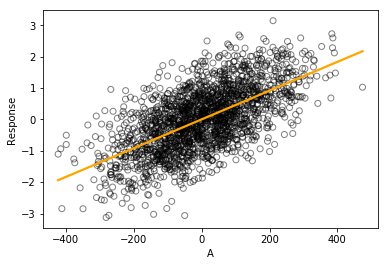

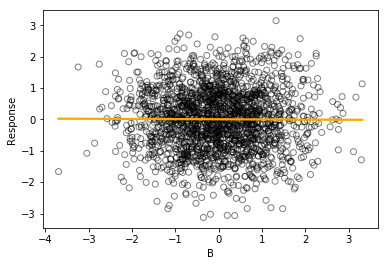

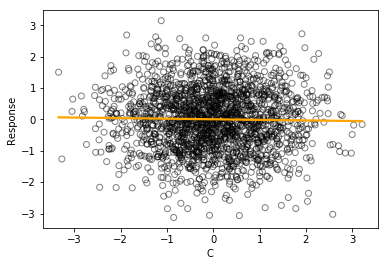

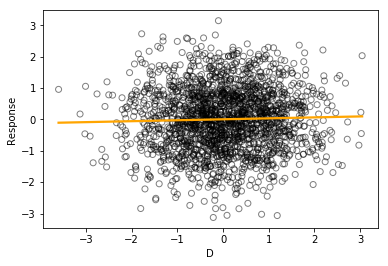

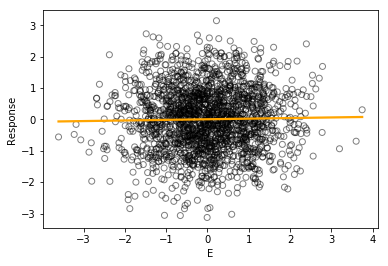

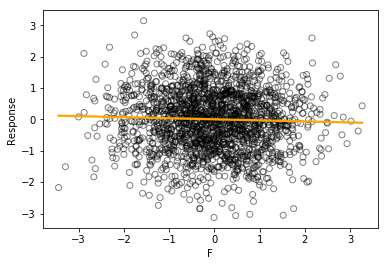

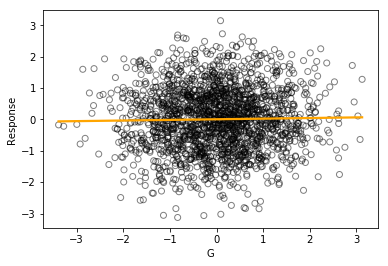

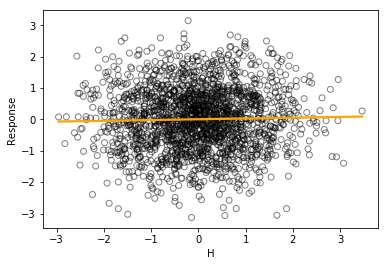

In [18]:
rst_numeric_features = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
pairwise_plot_with_regline(rst, rst_numeric_features, 'Response')

# correlated with A,C,F,G, H

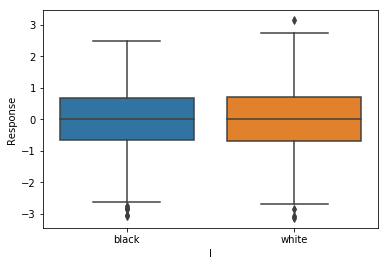

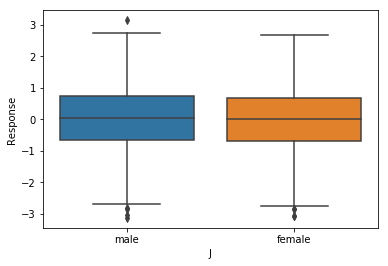

In [20]:
rst_categorical_features = ['I', 'J']
boxplot_categorical(df=rst, features=rst_categorical_features , response='Response')
#means are in the same level => not corelated

In [38]:
rst_num = pd.get_dummies(rst, drop_first = True)
X = rst_num.drop(["Response"], axis = 1)
y = rst_num.Response

In [42]:
rst_num.head

<bound method NDFrame.head of                A         B         C         D         E         F         G  \
0     -37.910962  0.350545  0.294552  0.366120 -0.576752 -1.970309  1.275513   
1     227.981669 -0.717015  0.469828 -0.277302  2.786344  0.559934  1.434860   
2      55.444851  0.781360  0.264977  0.131647 -0.643724  0.311586  0.900497   
3      92.396381 -0.205825  0.812590 -0.043973  0.025715 -1.381028  1.616132   
4     215.646697 -0.154529  0.552743 -1.195583  0.542664 -0.935838 -0.972779   
5     -66.396580  1.610534 -1.011185  0.165812  0.277794  1.373381 -0.320478   
6    -108.117779  0.830407 -0.642858 -1.885085  0.867435  0.218265  0.093356   
7     146.971011 -0.174464  0.141673  0.345828  0.545577 -0.818878 -0.278014   
8     161.172823 -0.041500  1.721033  0.328594 -0.478658  0.848963 -0.181535   
9      -9.130008  1.330463 -0.094334  2.719388  1.322686 -0.673862 -0.606275   
10    117.271516 -0.560657  0.687655  0.213162  0.677129 -0.192582 -1.467264   
11     13.

In [33]:
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
Rsquared = linear_model.score(X, y)
Rsquared

0.8206627737017529

In [45]:
linear_model_smf_A = smf.ols(formula = "Response ~ A + B + C + D + E + F + G + H + I_white + J_male  ",
                           data = rst_num).fit()

linear_model_smf_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     910.2
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:54:13   Log-Likelihood:                -1116.3
No. Observations:                2000   AIC:                             2255.
Df Residuals:                    1989   BIC:                             2316.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4937      0.017     28.458      0.000       0.460       0.528
A              0.0096      0.000     95.143      0.000       0.009       0.010
B             -0.0136      0.009     -1.463      0.144      -0.032       0.005
C             -0.7481      0.012    -62.017      0.000      -0.772      -0.724
D             -0.2332      0.010    -23.304      0.000      -0.253      -0.214
E             -0.0175      0.010     -1.834      0.067      -0.036       0.001
F             -0.0041      0.009     -0.433      0.665      -0.022       0.014
G             -0.0020      0.010     -0.210      0.834      -0.021       0.017
H              0.0018      0.009      0.189      0.850      -0.017       0.020
I_white       -1.0012      0.022    -46.131      0.000      -1.044      -0.959
J_male         0.0067      0.019      0.351      0.726      -0.031       0.044
==============================================================================
Omnibus:                       33.446   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.633
Skew:                          -0.063   Prob(JB):                     4.14e-14
Kurtosis:                       3.851   Cond. No.                         379.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#as p-val of b > 0.05
linear_model_smf_A.rsquared_adj

0.8197611285217717

In [48]:
linear_model_smf_A_1 = smf.ols(formula = "Response ~ A + C + D + E + F + G + H + I_white + J_male  ",
                           data = rst_num).fit()

linear_model_smf_A_1.rsquared_adj

0.8196578726460463

In [ ]:
#R adj is nearly the same so we drop B

In [52]:
linear_model_smf_A_2 = smf.ols(formula = "Response ~ A + C + D + F + G + H + I_white + J_male  ",
                           data = rst_num).fit()

linear_model_smf_A_2.rsquared_adj

0.8194546286876397

In [ ]:
# R  sq is nearly the same => drop E

In [53]:
linear_model_smf_A_3 = smf.ols(formula = "Response ~ A + C + D + G + H + I_white + J_male  ",
                           data = rst_num).fit()

linear_model_smf_A_3.rsquared_adj

0.8195335702615534

In [ ]:
# R  sq is nearly the same => drop F

In [54]:
linear_model_smf_A_4 = smf.ols(formula = "Response ~ A + C + D + H + I_white + J_male  ",
                           data = rst_num).fit()

linear_model_smf_A_4.rsquared_adj

0.819618503197228

In [ ]:
# R  sq is nearly the same => drop G

In [55]:
linear_model_smf_A_5 = smf.ols(formula = "Response ~ A + C + D + I_white + J_male  ",
                           data = rst_num).fit()

linear_model_smf_A_5.rsquared_adj

0.8197066437591958

In [ ]:
# drop H

In [56]:
linear_model_smf_A_6 = smf.ols(formula = "Response ~ A + C + D + I_white ",
                           data = rst_num).fit()

linear_model_smf_A_6.rsquared_adj

0.8197825714446796

In [ ]:
# drop J_mail

In [57]:
linear_model_smf_B = smf.ols(formula = "Response ~ A + C + D + I_white ",
                           data = rst_num).fit()

In [59]:
linear_model_smf_B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     2274.
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:10:49   Log-Likelihood:                -1119.2
No. Observations:                2000   AIC:                             2248.
Df Residuals:                    1995   BIC:                             2276.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4973      0.014     34.599      0.000       0.469       0.525
A              0.0096      0.000     95.307      0.000       0.009       0.010
C             -0.7474      0.012    -62.222      0.000      -0.771      -0.724
D             -0.2335      0.010    -23.371      0.000      -0.253      -0.214
I_white       -1.0007      0.022    -46.224      0.000      -1.043      -0.958
==============================================================================
Omnibus:                       35.165   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.660
Skew:                          -0.056   Prob(JB):                     3.35e-15
Kurtosis:                       3.887   Cond. No.                         358.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
X_mat = np.array(X)
y_mat = np.array(y)
score = np.array([])
for j in np.arange(10):
    kf = KFold(n_splits = 3, shuffle = True, random_state = j)
    for train_index, test_index in kf.split(X_mat):
        mod_kf = LinearRegression()
        X_train = X_mat[train_index,] 
        y_train = y_mat[train_index]
        X_test = X_mat[test_index,] 
        y_test = y_mat[test_index]
    
        mod_kf.fit(X_train,y_train)
        score = np.append(score, mod_kf.score(X_test, y_test))

In [92]:
score

array([0.81073953, 0.80754869, 0.83674803, 0.80002483, 0.8148237 ,
       0.83610373, 0.81676806, 0.79604135, 0.83763602, 0.81576698,
       0.82090064, 0.82085476, 0.81431209, 0.82384604, 0.8195848 ,
       0.8444247 , 0.80746177, 0.79784123, 0.79865802, 0.83161404,
       0.82058016, 0.80328384, 0.82355306, 0.82537721, 0.81789328,
       0.81489595, 0.82171413, 0.8152519 , 0.81864686, 0.82122882])

In [93]:
final_score = np.mean(score)
final_score

0.8178041407248415

In [95]:
R = final_score 
n = rst_num.shape[0]
p = X.shape[1]
print(p)
1 - (1 - R)*(n-1)/(n-p-1)

10


0.8168881233328096

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
for j in np.arange(X.shape[1]):
    print(X.columns[j], "   VIF->", variance_inflation_factor(X.values,j))

A    VIF-> 1.8715406634784646
B    VIF-> 1.0046544732049394
C    VIF-> 1.6343120379368559
D    VIF-> 1.0798907872343635
E    VIF-> 1.0037183291553728
F    VIF-> 1.005079757378223
G    VIF-> 1.0017833578371993
H    VIF-> 1.0057028036684035
I_white    VIF-> 1.5655522303559386
J_male    VIF-> 1.379838649271966


In [ ]:
# All VIF-s are less than 10  => no need to drop any column 

In [64]:
linear_model_smf_C = linear_model_smf_B

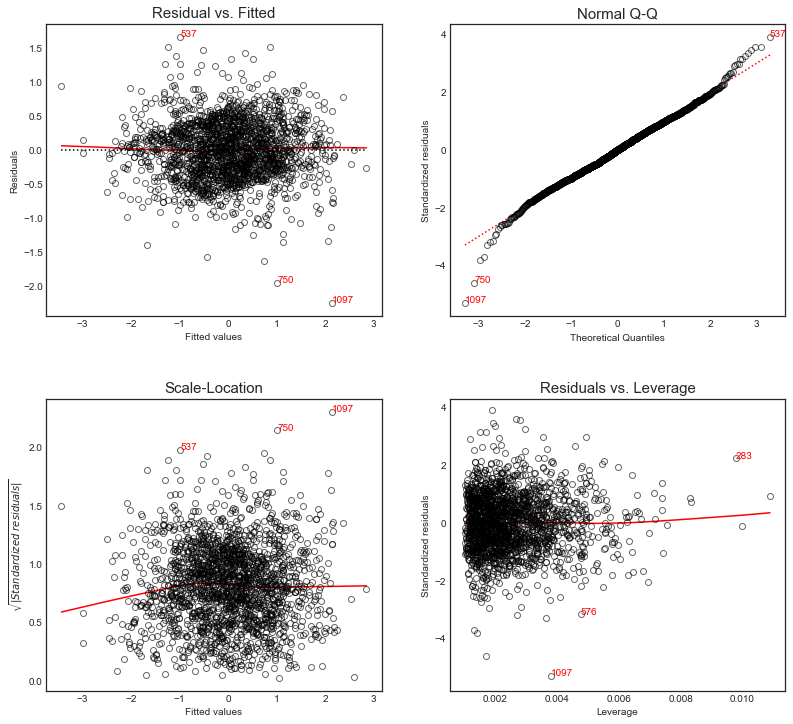

In [65]:
plt.figure(figsize = (11, 10))
lmdiag.plot(linear_model_smf_B)
plt.show()

In [ ]:
# Normal QQplot => not normal
# residuals vs fitted => nearly line , thats good

In [79]:
model_lasso_cv = LassoCV(n_alphas = 500, cv = 10, max_iter = 10000, normalize = True)
model_lasso_cv.fit(X,y)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=500, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [80]:
model_lasso_cv.score(X, y)

0.8205108557800931

In [81]:
model_lasso_cv.alpha_

6.562267057024381e-05

In [82]:
col_list = X.columns
coef_list = model_lasso_cv.coef_
list(zip(col_list, coef_list))

[('A', 0.009470561212701826),
 ('B', -0.010559317978186725),
 ('C', -0.7378801784599458),
 ('D', -0.22766164838600952),
 ('E', -0.014080705680154695),
 ('F', -0.0015811380525553465),
 ('G', -0.0),
 ('H', 0.0),
 ('I_white', -0.985531121279281),
 ('J_male', 0.0014457954982698795)]

In [ ]:
# Important fatures are 'I_white', 'C' than 'D', less importants are 'A', 'B','I', 'F', 'J_male',
# 'G', 'H' are unnesesary

In [88]:
L = Lasso(alpha = model_lasso_cv.alpha_)
L.fit(X, y)

L.score(X, y)

0.8206626911212284

In [89]:
col_list = X.columns
coef_list = L.coef_
list(zip(col_list, coef_list))

[('A', 0.009566080847240952),
 ('B', -0.013570037387684022),
 ('C', -0.747948421872926),
 ('D', -0.23309589462687696),
 ('E', -0.017432932066806805),
 ('F', -0.004013466952146592),
 ('G', -0.0019407319113264934),
 ('H', 0.0017316607838600848),
 ('I_white', -1.0007441747766657),
 ('J_male', 0.00641193421812724)]

In [ ]:
# when we give model_lasso_cv.alpha_ to model we get more presize mofel with all featurs contribution

In [85]:
def adj_rsquared(model, X, y):
    Rsquared = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    
    adj_r2 = 1 - (1 - Rsquared) * (n - 1)/(n - p - 1)
    
    return adj_r2

In [90]:
print(adj_rsquared(L, X, y))
print(linear_model_smf_A.rsquared_adj)
print(linear_model_smf_B.rsquared_adj)
print(linear_model_smf_C.rsquared_adj)

0.8197610455260611
0.8197611285217717
0.8197825714446796
0.8197825714446796


In [96]:
# C= B is better for having biggest R sq

In [102]:
linear_model_smf_A.mse_model

163.62343609846667

In [103]:
linear_model_smf_B.mse_model

408.7996025470409

In [101]:
np.mean(model_lasso_cv.mse_path_)

0.3043542417085286